### Using positive definite matrices in equations of ellipsoids

In [1]:
import numpy as np
from numpy import linalg as LA

from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

The equation of a circle (sphere, hypersphere) is $x^T x = 1$. In 2D

$$ x_1^2 + x_2^2 = 1 $$

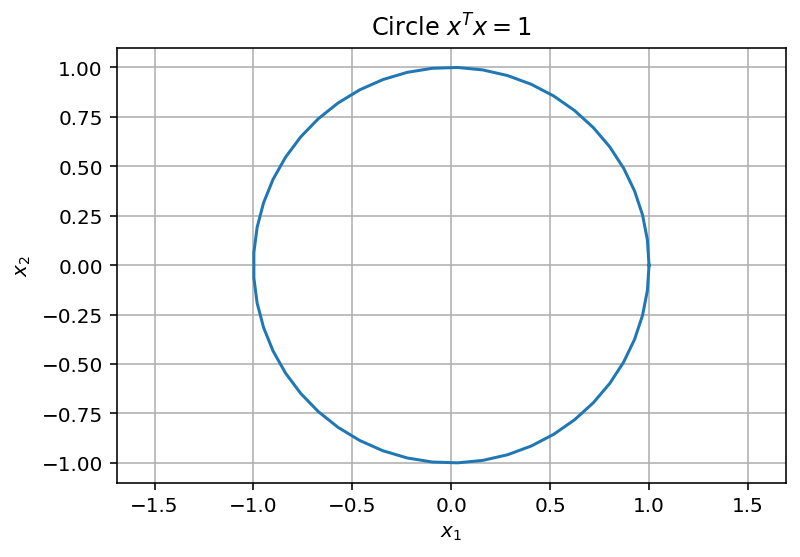

In [2]:
# plot circle using polar coordinates
th = np.linspace(0, 2 * np.pi)
x1 = np.cos(th)
x2 = np.sin(th)
plt.plot(x1, x2)
plt.axis('equal');
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Circle $x^Tx = 1$')
plt.grid()

Let's transform the circle based on the matrix
$$ S = \begin{bmatrix}
3 & 1 \\
1 & 3
\end{bmatrix}
$$
and its eigenvalues and eigenvectors.

In [3]:
S = np.array(((3, 1), (1, 3)))
S

array([[3, 1],
       [1, 3]])

In [4]:
# compute eigenvalues (lam) and eigenvectors (Q)
lam, Q = LA.eig(S)

In [5]:
print(lam)
print(np.sqrt(2) * Q)

[4. 2.]
[[ 1. -1.]
 [ 1.  1.]]


The matrix $S$ is symmetric and has positive eigenvalues. $S$ is positive definite.

Define a new variable $y = \Lambda^{-1/2}x$. That is, $y_i = x_i/\sqrt{\lambda_i}$. 

The new variable $y_i$ is stretched relative to $x_i$ when $\lambda_i>1$. Eigenvalues are positive so taking square roots is not a problem.

What equation does $y$ satisfy when $x$ is on the unit circle?

$$ 1 = x^T x = y^T \Lambda^{1/2} \Lambda^{1/2} y = y^T \Lambda y$$

In 2D

$$ \lambda_1^2 y_1^2 + \lambda_2^2 y_2^2 = 1 $$ 

or in the form of an ellipse:

$$ \left(\frac{y_1}{1/\sqrt{\lambda_1}}\right)^2 + \left(\frac{y_2}{1/\sqrt{\lambda_2}}\right)^2 = 1$$

In general, $y^T \lambda y = 1$ is the equation of an ellipsoid with axis lengths $1/\sqrt{\lambda_i}$ along the axis $e_i$, where $e_i$ is the $i$-th column of $I$.

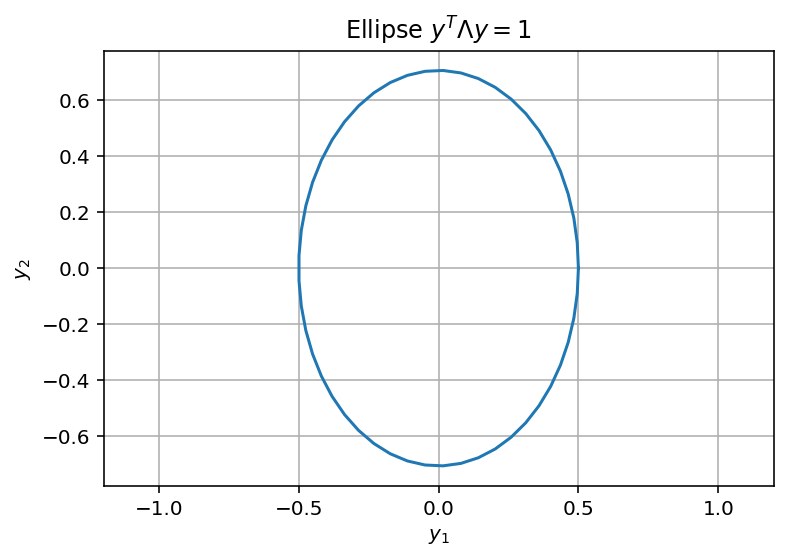

In [6]:
# plot the 2D example
y1 = x1 / np.sqrt(lam[0]) 
y2 = x2 / np.sqrt(lam[1]) 
plt.plot(y1, y2)
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.grid()
plt.title('Ellipse $y^T \Lambda y = 1$')
plt.axis('equal');

Define the new variable $z = Q^T y = Q^T \Lambda^{-1/2} x$. 

In this example, $Q$ rotates $y$ by 45 degrees.

$$ Q = \frac{1}{\sqrt{2}} 
\begin{bmatrix}
1 & -1 \\
1 & 1
\end{bmatrix}
=
\begin{bmatrix}
\cos \pi/4 & -\sin \pi/4 \\
\sin \pi/4 & \cos \pi/4
\end{bmatrix}
$$

What equation does $z$ satisfy?

$$1 = y^T \Lambda y = z^T Q \Lambda Q^T z = z^T S z$$

is the equation of a rotated ellipse.

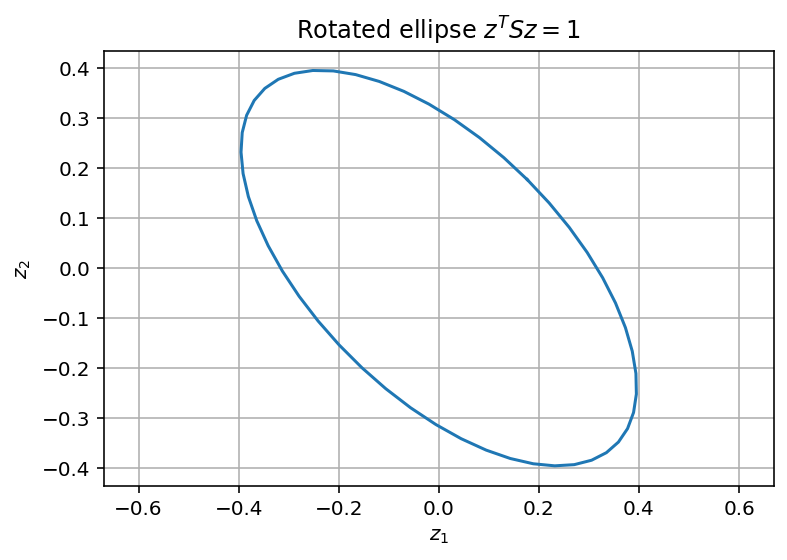

In [7]:
# plot the rotated ellipse
z = Q @ np.stack((y1, y2))
z = Q @ np.diag(1./lam) @ np.stack((x1, x2))


z1 = z[0,]
z2 = z[1,]
plt.plot(z1, z2)
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')
plt.grid()
plt.title('Rotated ellipse $z^TS z = 1$')
plt.axis('equal');

In general, $z^T S z = 1$ is the equation of an ellipsoid with axis length $1/\sqrt{\lambda_i}$ in the direction $q_i$, where $e_i$ is the $i$-th column of $Q$.